<img src='multilinearreg.png' />

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# Original Raw Data
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

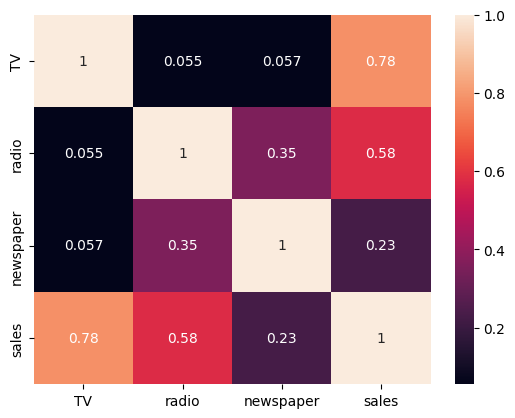

In [4]:
sns.heatmap(df.corr(),annot = True)

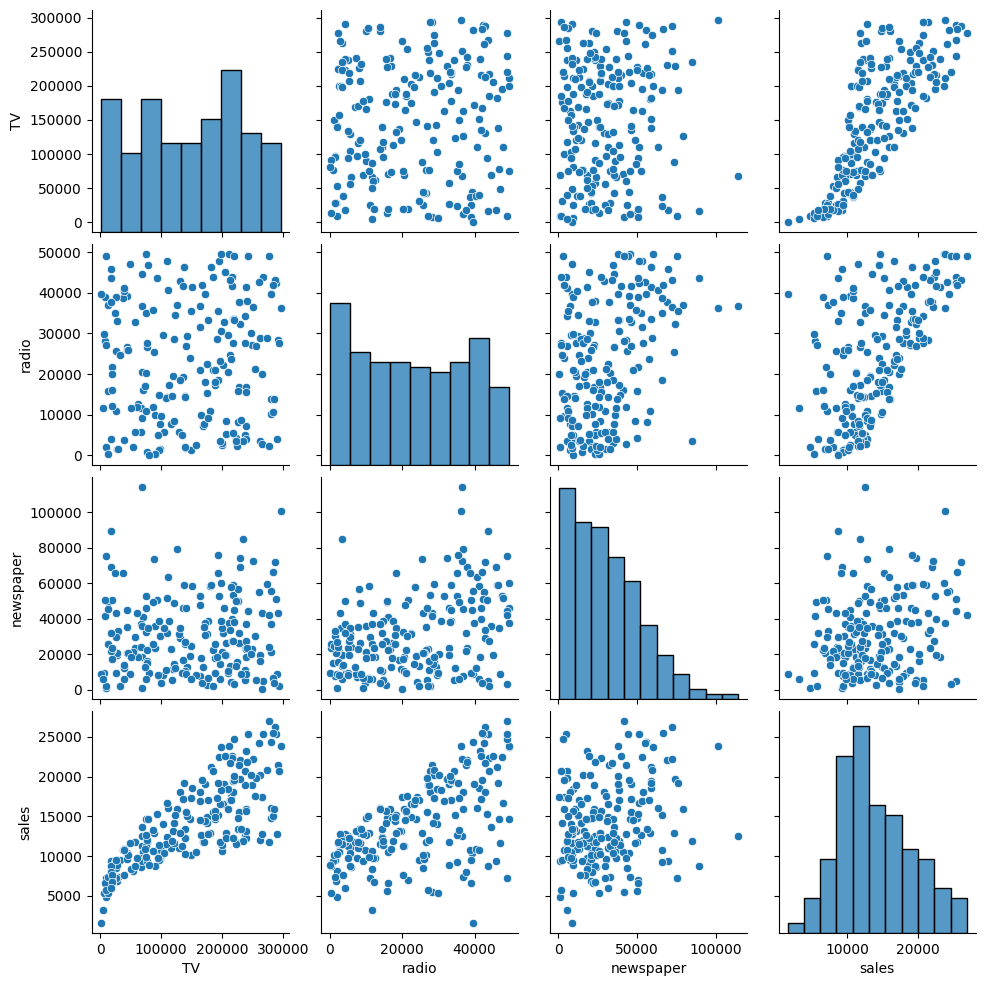

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
X = df[['TV','radio','newspaper']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [7]:
print(mlr_model.intercept_)
print(mlr_model.coef_)

2996.463132658775
[ 0.045958    0.18546021 -0.00272911]


In [8]:
sales_pred = mlr_model.predict([[149000,22000,12000]])
print(sales_pred)

[13891.58043661]


/Users/durgaprasad/Desktop/_WEEKEND/DAY1-Python-Flask/basicpythonenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
#Training data  Accuracy 

sales_pred_train = mlr_model.predict(X_train)
mse = mean_squared_error(y_train,sales_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train,sales_pred_train)

print("Root Mean Squared Error:", rmse.round().astype(int))
print("R-squared:", r2)

Root Mean Squared Error: 1722
R-squared: 0.8869244310370576


In [10]:
#Testing Data Accuracy 
sales_pred_test = mlr_model.predict(X_test)
mse = mean_squared_error(y_test,sales_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,sales_pred_test)

print("Root Mean Squared Error:", rmse.round().astype(int))
print("R-squared:", r2)

Root Mean Squared Error: 1445
R-squared: 0.9308589334107374


In [11]:
#Calculating cross validation matrics

scores = cross_val_score(mlr_model,X,y,cv=5)
#print(scores)
print('Cross Validation :', scores.mean())


Cross Validation : 0.8871063495438435


In [12]:
#Linerity of Errors 

y_pred_test = mlr_model.predict(X_test)
error_test = y_test - y_pred_test
print(error_test.skew())


-0.8547316624749354


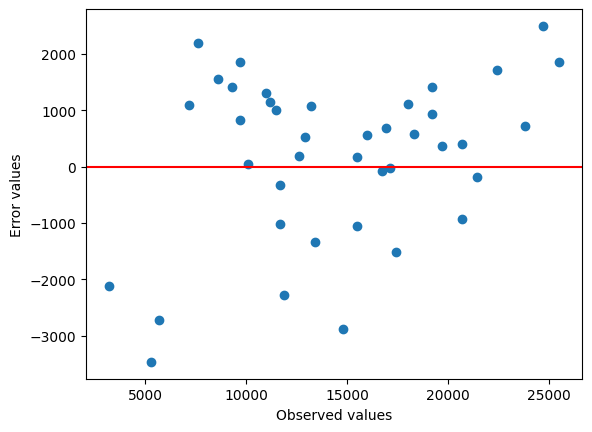

In [13]:
# Variance of Errors 
plt.scatter(y_test,error_test)
plt.axhline(y=0,color='red')
plt.xlabel('Observed values')
plt.ylabel('Error values')
plt.show()

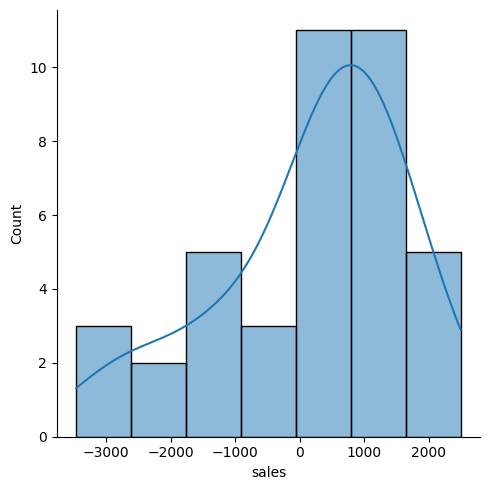

In [14]:
# Normality of Errors 
sns.displot(error_test,kde=True)
plt.show()

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming you have defined your X_train and y_train
# Create a DataFrame from your training data
#data = pd.concat([X_train, y_train], axis=1)

# Fit an OLS regression model
smf_model = smf.ols(formula='y~X', data=df).fit()

# Print the model summary
print(smf_model.summary())

ModuleNotFoundError: No module named 'statsmodels'

<h3>Here Newspapaer is.... </h3>
1. having less correlation with sales from corr() , heatmap and pairplot<br>
2. having very less cofficent (-ve value from summary model)<br>

<h3>with error assumptions </h3>
1. Prob value is < alpha <br>
2. X[2] i.e newspaper is having 0.86 P>t value and others has zero <br>
3. Left skewed <br>
4. errors are of not equal variance. I.e upper limit != lower limit <br>

<img src='ptest.png' />


In [16]:
#Added Variable Plot - applying simple linear regression on individual variable and checking regression line
import statsmodels.api as sm 
sm.graphics.plot_partregress_grid(smf_model)

ModuleNotFoundError: No module named 'statsmodels'

We already got 3 hints to drop the newspapaer column <br>
1. Correlation matrix and heatmap <br> 
2. almost equal to zero coefficent <br>
3. Assumptions failed with left skew <br>

Hence it have low impact on the sales column.

# VIF - Variable Inflation Factor
--How much a independent variable is impacting/influensing the other independent variables 

In [17]:
tv_model = smf.ols('TV~radio+newspaper',data= df).fit()
tv_model.summary()

NameError: name 'smf' is not defined

===============<br>
Here R-squared:	0.005 indicates that TV have 0.5% influence on radio and newspaper

In [18]:
rsq_TV = smf.ols('TV~radio+newspaper',data= df).fit().rsquared
vif_tv = 1/(1-rsq_TV)
print(vif_tv)

NameError: name 'smf' is not defined

================= <br>
here vif_tv < 4 then we can infer that it not have significent influence on radio and newspaper

<h1> Hence we can decide to drop the column and check if the accuracy increases. </h1>

In [19]:
X1 = df[['TV','radio']]
y1 = df['sales']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=13)
mlr_model1 = LinearRegression()
mlr_model1.fit(X1_train, y1_train)

LinearRegression()

In [20]:
print(mlr_model1.intercept_)
print(mlr_model1.coef_)

2940.928388803626
[0.04598719 0.18413716]


In [21]:
sales_pred1 = mlr_model1.predict([[149000,22000]])
print(sales_pred1)

[13844.03767696]


/Users/durgaprasad/Desktop/_WEEKEND/DAY1-Python-Flask/basicpythonenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
#Training data  Accuracy 

sales_pred_train1 = mlr_model1.predict(X1_train)
mse = mean_squared_error(sales_pred_train1, y1_train)
rmse = np.sqrt(mse)
r2 = r2_score(sales_pred_train1,y1_train)

print("Root Mean Squared Error:", rmse.round().astype(int))
print("R-squared:", r2)

Root Mean Squared Error: 1723
R-squared: 0.8723763280664383


In [23]:
#Testing Data Accuracy 
sales_pred_test1 = mlr_model1.predict(X1_test)
mse = mean_squared_error(sales_pred_test1, y1_test)
rmse = np.sqrt(mse)
r2 = r2_score(sales_pred_test1,y1_test)

print("Root Mean Squared Error:", rmse.round().astype(int))
print("R-squared:", r2)

Root Mean Squared Error: 1440
R-squared: 0.924399823714912


In [24]:
#Calculating cross validation matrics

scores1 = cross_val_score(mlr_model1,X1,y1,cv=5)
#print(scores)
print('Cross Validation :', scores1.mean())

Cross Validation : 0.889282957306453


In [25]:
#Linerity of Errors 

y_pred_test1 = mlr_model1.predict(X1_test)
error_test1 = y1_test - y_pred_test1
print(error_test1.skew())

-0.8163834650077643


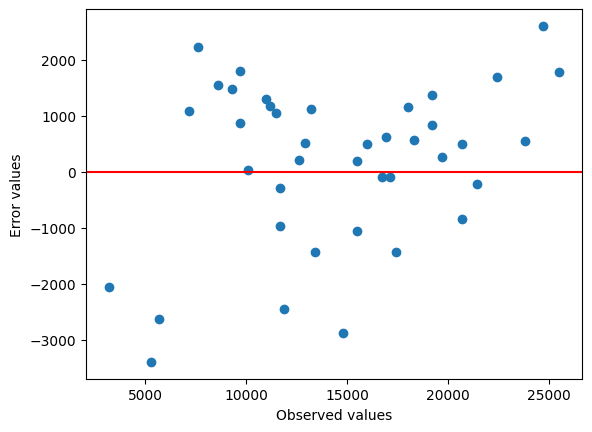

In [26]:
# Variance of Errors 
plt.scatter(y1_test,error_test1)
plt.axhline(y=0,color='red')
plt.xlabel('Observed values')
plt.ylabel('Error values')
plt.show()

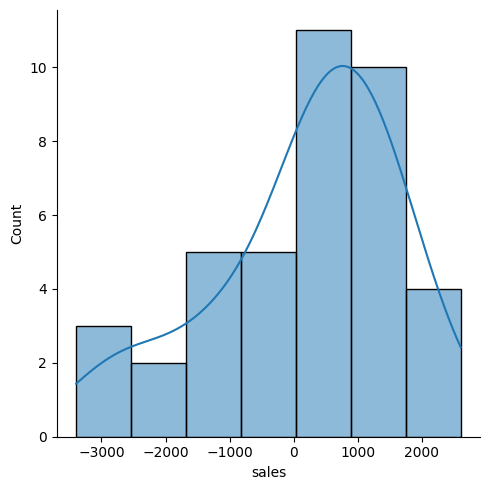

In [27]:
# Normality of Errors 
sns.displot(error_test1,kde=True)
plt.show()

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming you have defined your X_train and y_train
# Create a DataFrame from your training data
#data = pd.concat([X_train, y_train], axis=1)

# Fit an OLS regression model
smf_model1 = smf.ols(formula='y1~X1', data=df).fit()

# Print the model summary
print(smf_model1.summary())

ModuleNotFoundError: No module named 'statsmodels'

<h3> Checking with polynomial Regression </h3>

In [29]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree = 2, include_bias= False)
X_poly = polynomial_converter.fit_transform(X)
X_poly = pd.DataFrame(X_poly)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly, y, train_size=0.8, random_state=13)
#Xp_train = pd.DataFrame(polynomial_converter.fit_transform(X_train))
#Xp_test = pd.DataFrame(polynomial_converter.fit_transform(X_test))

In [30]:
Xp_train.head()

,0,1,2,3,4,5,6,7,8
125,87200.0,11800.0,25900.0,7.603840e+09,1.028960e+09,2.258480e+09,1.392400e+08,3.056200e+08,6.708100e+08
68,237400.0,27500.0,11000.0,5.635876e+10,6.528500e+09,2.611400e+09,7.562500e+08,3.025000e+08,1.210000e+08
69,216800.0,43900.0,27200.0,4.700224e+10,9.517520e+09,5.896960e+09,1.927210e+09,1.194080e+09,7.398400e+08
108,13100.0,400.0,25600.0,1.716100e+08,5.240000e+06,3.353600e+08,1.600000e+05,1.024000e+07,6.553600e+08
131,265200.0,2900.0,43000.0,7.033104e+10,7.690800e+08,1.140360e+10,8.410000e+06,1.247000e+08,1.849000e+09


In [31]:
X_train.head()

,TV,radio,newspaper
125,87200,11800,25900
68,237400,27500,11000
69,216800,43900,27200
108,13100,400,25600
131,265200,2900,43000


In [32]:
pr_model = LinearRegression()
pr_model.fit(Xp_train, y_train)

LinearRegression()

In [33]:
pr_model.intercept_

np.float64(5395.3213282818215)

In [34]:
pr_model.coef_

array([ 5.00509369e-02,  2.64090287e-02, -3.34338209e-03, -1.08183224e-07,
        1.09570490e-06, -1.99806774e-08, -4.57601860e-08,  1.92199078e-07,
        3.46221933e-08])

In [35]:
#Training data  Accuracy 

sales_pred_train2 = pr_model.predict(Xp_train)
mse = mean_squared_error(y_train,sales_pred_train2)
rmse = np.sqrt(mse)
r2 = r2_score(y_train,sales_pred_train2)

print("Root Mean Squared Error:", rmse.round().astype(int))
print("R-squared:", r2)

Root Mean Squared Error: 609
R-squared: 0.9858447971957983


In [36]:
#Testing Data Accuracy 
sales_pred_test2 = pr_model.predict(Xp_test)
mse = mean_squared_error(y_test,sales_pred_test2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,sales_pred_test2)

print("Root Mean Squared Error:", rmse.round().astype(int))
print("R-squared:", r2)

Root Mean Squared Error: 619
R-squared: 0.9873048547590936


In [37]:
#Calculating cross validation matrics

scores2 = cross_val_score(pr_model,X_poly,y,cv=5)
print('Cross Validation :', scores2.mean())

Cross Validation : 0.9842540981582397


In [38]:
sales_pred = pr_model.predict(polynomial_converter.fit_transform([[149000,22000,12000]]))
print(sales_pred)

[14581.58663082]


# Here degree 3 gave best results than degree 2 and multi linear regession model 